In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Kenya_Schools.csv")
df.head()

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
0,VOO SPECIAL UNIT,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY & BOARDING,SPECIAL SCHOOL,19.0,19.0,6.3,...,0,EASTERN,KITUI,MUTHA,VOO,MUTITO,"(-1.66668, 38.32132)",-1.666680,38.321320,KITUI
1,MASAANTARE PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,44.3,53.2,88.7,...,1,RIFT VALLEY,NAROK,OLOLUNGA,NAROK SOUTH,OLOLUNGA,"(-1.012145, 35.648155)",-1.012145,35.648155,NAROK
2,NGOCHONI PRY SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMET/DEB,MIXED,DAY ONLY,ORDINARY,37.6,32.9,131.5,...,0,NYANZA,KURIA,MABERA,BUGUMBE WEST,KURIA,"(-1.159798, 34.394076)",-1.159798,34.394076,MIGORI
3,NEEMA JUNIOR ACADEMY,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,18.9,22.0,44.0,...,1,CENTRAL,THIKA,KAMWANGI,MANGU,GATUNDU NORTH,"(-0.99747, 36.93082)",-0.997470,36.930820,KIAMBU
4,LWANDA PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,42.0,52.5,0.0,...,0,NYANZA,RACHUONYO,KABONDO,KAWOUR,KASIPUL KABONDO,"(-0.42783, 34.92995)",-0.427830,34.929950,HOMA BAY


In [3]:
ll = df.loc[df['County'] == 'NAIROBI']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ll.columns

Index(['Name of School', 'Level of Education', 'Status of School',
       'Sponsor of School', 'School Institution Type_1',
       'School Institution Type_2', 'School Institution Type_3',
       'Pupil Teacher Ratio', 'Pupil Classroom Ratio', 'Pupil Toilet Ratio',
       'Total Number of Classrooms', 'Boys Toilets', 'Girls Toilets',
       'Teachers Toilets', 'Total Toilets', 'Total Boys', 'Total Girls',
       'Total Enrolment', 'GOK TSC Male', 'GOK TSC Female',
       'Local Authority Male', 'Local Authority Female', 'PTA BOG Male',
       'PTA BOG Female', 'Others Male', 'Others Female',
       'Non-Teaching Staff Male', 'Non-Teaching Staff Female', 'Province',
       'District', 'Division', 'Location', 'Costituency', 'Geolocation',
       'Latitude', 'Longitude', 'County'],
      dtype='object')

In [8]:
X = ll['Total Number of Classrooms']
Y = ll['Total Enrolment']

In [14]:
#training data, 80%
xTrain = X[:1024]
yTrain = Y[:1024]
xTest = X[1024:]
yTest = Y[1024:]

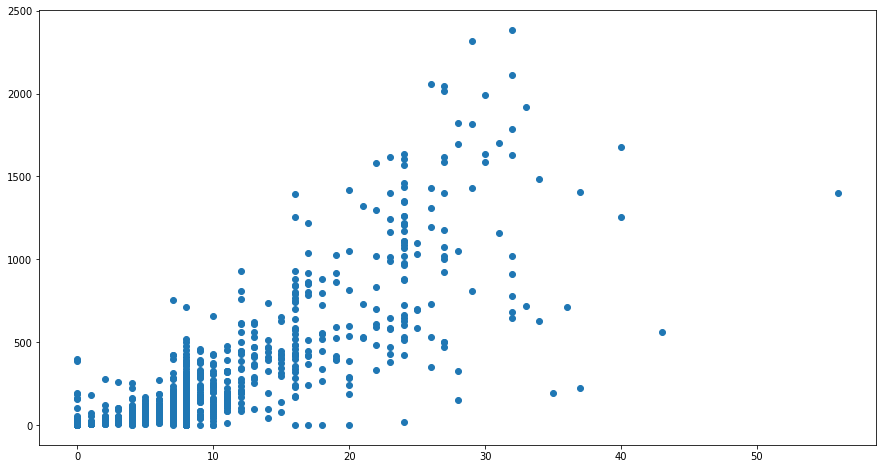

In [15]:
#Plot training data
plt.figure(figsize=(15, 8))
plt.scatter(xTrain, yTrain)

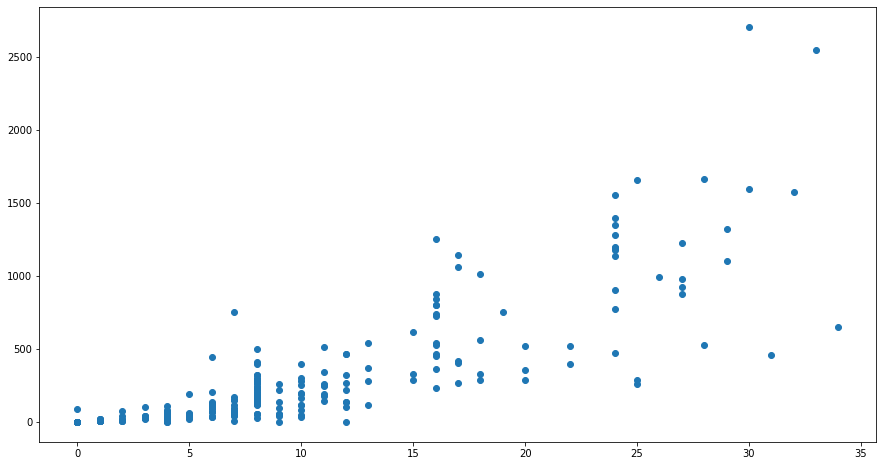

In [16]:
#plot testing data
plt.figure(figsize=(15, 8))
plt.scatter(xTest, yTest)

In [17]:
from scipy import stats

In [19]:
# Entire dataset 
r = stats.linregress(X, Y)
r

LinregressResult(slope=39.253505504668745, intercept=-83.15660604860494, rvalue=0.8179977896003555, pvalue=3.197484523601706e-309, stderr=0.7721397253634185)

In [20]:
# Testing data set
r = stats.linregress(xTrain, yTrain)
r

LinregressResult(slope=38.40812053887466, intercept=-77.48156782477179, rvalue=0.8174345270161376, pvalue=4.495802164496318e-247, stderr=0.8466098966122552)

In [21]:
# Training data set
r = stats.linregress(xTest, yTest)
r

LinregressResult(slope=42.678430747852175, intercept=-108.13470617035256, rvalue=0.8225887132553475, pvalue=3.244786816148333e-64, stderr=1.8511593244638929)

In [94]:
def myfunc(x):
    return r.slope * x + r.intercept

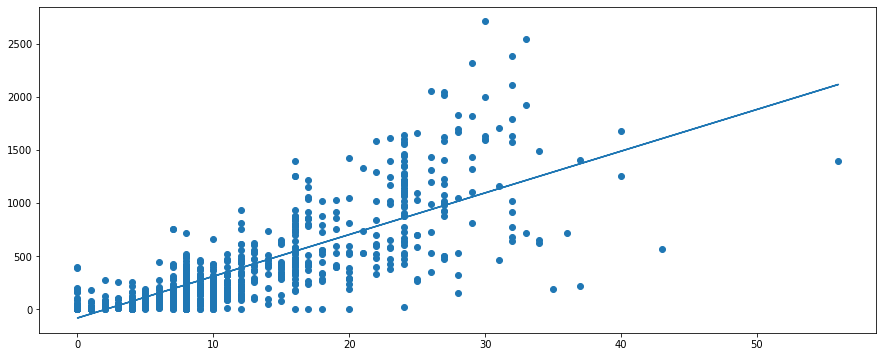

In [96]:
plt.figure(figsize=(15, 6))
plt.scatter(X, Y)
newModel = list(map(myfunc, X))
plt.plot(X, newModel)

In [98]:
xx = df['Total Number of Classrooms']
yy = df['Total Enrolment']

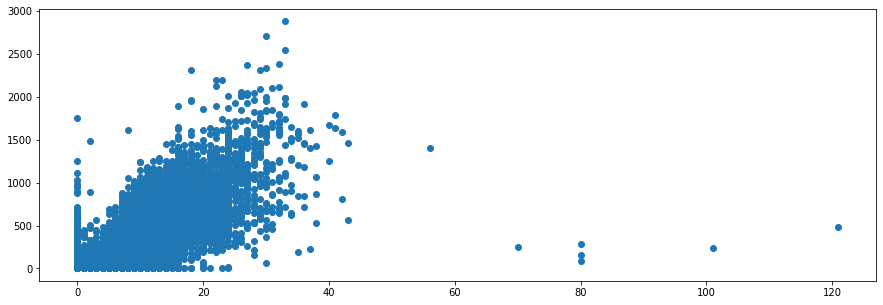

In [100]:
plt.figure(figsize=(15, 5))
plt.scatter(xx, yy)

In [101]:
xxc = stats.linregress(xx, yy)
xxc

LinregressResult(slope=38.382091918474465, intercept=-31.410499092094767, rvalue=0.7574212741537655, pvalue=0.0, stderr=0.20523146357965324)